<a href="https://colab.research.google.com/github/Adkim16/Information-Retrieval-Project/blob/main/Information_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Librerie*

In [ ]:
! git clone https://github.com/Adkim16/Information-Retrieval-Project.git
! pip install tika
! pip install PyPDF2
! pip install nltk
! pip install pyldavis
! pip install PyMuPDF
! pip install word2number
!pip install -U spacy
!pip install pycountry
!pip install pycountry_convert


# SPACY
#!pip install -U pip setuptools wheel
#!pip install -U spacy

#accuracy
#!python -m spacy download en_core_web_trf

#efficiency
#!python -m spacy download en_core_web_sm

#bigger model (https://spacy.io/models/en/#en_core_web_md)
#!python -m spacy download en_core_web_md

#bigger
!python -m spacy download en_core_web_lg



fatal: destination path 'Information-Retrieval-Project' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07

In [ ]:

import pycountry_convert as pc
import fitz
import PyPDF2 as pypdf
from PyPDF2 import PdfFileReader, PdfFileWriter
from tika import parser
import word2number
from string import punctuation
import nltk
import string
from nltk.stem.porter import *
from word2number import w2n
from nltk.corpus import wordnet as wn
nltk.download('punkt')
nltk.download('wordnet')
import warnings
warnings.filterwarnings('ignore')
import numpy as np


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
path_list = ["/content/Information-Retrieval-Project/Rules/PDG_Rules_FINAL.pdf",
             '/content/Information-Retrieval-Project/Rules/LOD_Rules_Aug2016.pdf',
             '/content/Information-Retrieval-Project/Rules/GandhiRulesFINALLo-Res.pdf',
             '/content/Information-Retrieval-Project/Rules/FireLake-RULES-2018.pdf',
             '/content/Information-Retrieval-Project/Rules/FS_Rules_2018.pdf',
             '/content/Information-Retrieval-Project/Rules/ColTwi-RULES-LR-May2018.pdf',
             '/content/Information-Retrieval-Project/Rules/CL-RULES-2019-LivingRules.pdf',
             '/content/Information-Retrieval-Project/Rules/ADP-RULES-2015.pdf',
             '/content/Information-Retrieval-Project/Rules/ABBLivingRulesNov-20.pdf',
             '/content/Information-Retrieval-Project/Rules/A-RULES-2018-FINAL.pdf']
new_path = {x.replace('/content/Information-Retrieval-Project/Rules/', '').replace('.pdf','') for x in path_list}


#Estrazione

In [ ]:
#estrazione testo

def get_words2 (path) :
  pdf2 = 'text.pdf'

  pdf = fitz.open(path)
  pages = range(1,pdf.page_count)
  pdf.select(pages)
  pdf.save(pdf2)

  parsed = parser.from_file(pdf2)
  return parsed['content']

words_list = [None] * 10

for k in range(len(path_list)):
  words_list[k] = get_words2(path_list[k])

len(words_list[0])

203214

In [ ]:
#estrazione token

#tokens = nltk.word_tokenize(parsed['content'])
#print(tokens)

def get_token(text):
  tok_list = []

  for k in range(len(text)) :
    tok_list.append(nltk.word_tokenize(text[k]))
  return tok_list


token_list = (get_token(words_list))
(token_list[0])[:5]

['2', 'Pendragon', '~', 'Rules', 'of']

In [ ]:
#estrazione capitoli

def get_chapter(text):
  i=0
  pos_chapters = []
  chapters = ['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']
  ch = 1

  #cambiare text[0] con tutto il testo
  
  for t in text:
    for e in chapters:
      if e in t and str(ch) in e and ")" not in (text)[i+1:i+10]:
        #print(t + "\t")
        #print(str(ch) + ".0\n-----------")
        ch += 1
        pos_chapters.append(i)
    i += 1

  chapterText = []

  i = 1
  while i < ch-1:
    chapterText.append((text)[pos_chapters[i-1]:pos_chapters[i]-1])
    i += 1

  chapterText.append((text)[pos_chapters[i-1]:]) 
  
  return pos_chapters,ch

def get_text_in_chapter(text):
  i=0
  pos_chapters = []
  chapters = ['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']
  ch = 1

  #cambiare text[0] con tutto il testo
  
  for t in text:
    for e in chapters:
      if e in t and str(ch) in e and ")" not in (text)[i+1:i+10]:
        #print(t + "\t")
        #print(str(ch) + ".0\n-----------")
        ch += 1
        pos_chapters.append(i)
    i += 1

  chapterText = []

  i = 1
  while i < ch-1:
    chapterText.append((text)[pos_chapters[i-1]:pos_chapters[i]-1])
    i += 1

  chapterText.append((text)[pos_chapters[i-1]:]) 
  
  return chapterText

get_chapter(token_list[2])
get_text_in_chapter(token_list[2])[0][:5]

['1.0', 'INTRODUCTION', 'Gandhi', 'is', 'a']

In [ ]:
#estrazione token per capitolo

def len_chapter(text):
  pos_chapters,ch = get_chapter(text)

  chapterText = []

  i = 1
  
  while i < ch-1:
    chapterText.append(text[pos_chapters[i-1]:pos_chapters[i]-1])
    i += 1

  chapterText.append(text[pos_chapters[i-1]:])

  k = 0
  for e in chapterText:
    print(str(len(chapterText[k])) + "   " + str(k+1))
    k += 1
  
len_chapter(token_list[0])



4168   1
1371   2
57   3
9760   4
1107   5
2472   6
738   7
20303   8


#Pulizia

In [ ]:
#rimozione punteggiatura

def clean_chaptertext(text):

  clean_chapter = []

  for ch in text:
    clean_tokens = [x for x in ch if x not in punctuation]
    clean_chapter.append(clean_tokens)
  return clean_chapter


len(clean_chaptertext(get_text_in_chapter(token_list[0])))

8

#Topic

##Luogo

In [ ]:
def get_country(text, path):
  place = ['Place']
  country_list = ["Afghanistan","Albania","Algeria", "America", "Andorra","Angola","Anguilla","Antigua & Barbuda","Argentina","Armenia","Aruba","Australia","Austria","Azerbaijan","Bahamas","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bermuda","Bhutan","Bolivia","Bosnia & Herzegovina","Botswana","Brazil", "Britain", "British Virgin Islands","Brunei","Bulgaria","Burkina Faso","Burundi","Cambodia","Cameroon","Cape Verde","Cayman Islands","Chad","Chile","China","Colombia","Congo","Cook Islands","Costa Rica","Cote D Ivoire","Croatia","Cruise Ship","Cuba","Cyprus","Czech Republic","Denmark","Djibouti","Dominica","Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Estonia","Ethiopia","Falkland Islands","Faroe Islands","Fiji","Finland","France","French Polynesia","French West Indies","Gabon","Gambia", "Gaul","Georgia","Germany","Ghana","Gibraltar","Greece","Greenland","Grenada","Guam","Guatemala","Guernsey","Guinea","Guinea Bissau","Guyana","Haiti","Honduras","Hong Kong","Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland","Isle of Man","Israel","Italy","Jamaica","Japan","Jersey","Jordan","Kazakhstan","Kenya","Kuwait","Kyrgyz Republic","Laos","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Luxembourg","Macau","Macedonia","Madagascar","Malawi","Malaysia","Maldives","Mali","Malta","Mauritania","Mauritius","Mexico","Moldova","Monaco","Mongolia","Montenegro","Montserrat","Morocco","Mozambique","Namibia","Nepal","Netherlands","Netherlands Antilles","New Caledonia","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Palestine","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal","Puerto Rico","Qatar","Reunion", "Romania","Russia","Rwanda","Saint Pierre &amp; Miquelon","Samoa","San Marino","Satellite","Saudi Arabia","Senegal","Serbia","Seychelles","Sierra Leone","Singapore","Slovakia","Slovenia","South Africa","South Korea","Spain","Sri Lanka","St Kitts &amp; Nevis","St Lucia","St Vincent","St. Lucia","Sudan","Suriname","Swaziland","Sweden","Switzerland","Syria","Taiwan","Tajikistan","Tanzania","Thailand","Timor L'Este","Togo","Tonga","Trinidad &amp; Tobago","Tunisia","Turkey","Turkmenistan","Turks & Caicos","Uganda","Ukraine","United Arab Emirates","United Kingdom","Uruguay","Uzbekistan","Venezuela","Vietnam","Virgin Islands (US)","Yemen","Zambia","Zimbabwe"]

  c=0
  for k in range(len(path)):
    print(path[c])
    c+=1
    for e in clean_chaptertext(get_text_in_chapter(text[k]))[0]:
      if e in country_list:
        
        print(e)
        place.append(e)
        break
  print(place)
  return place

topic_luogo = get_country(token_list,path_list)



/content/Information-Retrieval-Project/Rules/PDG_Rules_FINAL.pdf
Britain
/content/Information-Retrieval-Project/Rules/LOD_Rules_Aug2016.pdf
America
/content/Information-Retrieval-Project/Rules/GandhiRulesFINALLo-Res.pdf
India
/content/Information-Retrieval-Project/Rules/FireLake-RULES-2018.pdf
Vietnam
/content/Information-Retrieval-Project/Rules/FS_Rules_2018.pdf
Gaul
/content/Information-Retrieval-Project/Rules/ColTwi-RULES-LR-May2018.pdf
Algeria
/content/Information-Retrieval-Project/Rules/CL-RULES-2019-LivingRules.pdf
Cuba
/content/Information-Retrieval-Project/Rules/ADP-RULES-2015.pdf
Afghanistan
/content/Information-Retrieval-Project/Rules/ABBLivingRulesNov-20.pdf
Finland
/content/Information-Retrieval-Project/Rules/A-RULES-2018-FINAL.pdf
Colombia
['Place', 'Britain', 'America', 'India', 'Vietnam', 'Gaul', 'Algeria', 'Cuba', 'Afghanistan', 'Finland', 'Colombia']


##Periodo storico

In [ ]:
def cent_to_year(cent):
  return str(cent*100-100)+'-'+str((cent*100))

period = ['Period']
def get_period(text, path):
  years = []
  p=-1;
  c=0
  appeso = False

  for k in range(len(path)):
    appeso = False
    print(path[c])
    c+=1
    for e in clean_chaptertext(get_text_in_chapter(text[k]))[0]:
      p+=1
      if "-" in e:
        num = e.split('-')
        if num[0].isnumeric() and int(num[0])>100  and num[1].isnumeric()  :
          period.append(e)
          appeso = True
          print(e)
      elif e[-1] == 's' and e[:-1].isnumeric():
        years.append(e)
      elif 'Century' in e:
        cent = (clean_chaptertext(get_text_in_chapter(text[k]))[0][p-1:p+1][0])
        period.append(cent_to_year(int(cent.replace('th',''))))
        appeso = True
        print(cent_to_year(int(cent.replace('th',''))))
      elif 'from' in e:
        if (clean_chaptertext(get_text_in_chapter(text[k]))[0][p]).isnumeric():
          if(int(clean_chaptertext(get_text_in_chapter(text[k]))[0][p])):
              try:
                period.append(clean_chaptertext(get_text_in_chapter(text[k]))[0][p]+'-'+clean_chaptertext(get_text_in_chapter(text[k]))[0][p+2])
                appeso = True
                print(clean_chaptertext(get_text_in_chapter(text[k]))[0][p]+'-'+clean_chaptertext(get_text_in_chapter(text[k]))[0][p+2])
              except IndexError:
                print('')
    p=0
    if len(years)==2: 
        period.append(years[0].replace('s','')+'-'+years[1].replace('s',''))
        appeso = True

    if appeso == False:
      period.append(None)
        
  print(period)
  return period

topic_periodo = get_period(token_list,path_list)


/content/Information-Retrieval-Project/Rules/PDG_Rules_FINAL.pdf
400-500
/content/Information-Retrieval-Project/Rules/LOD_Rules_Aug2016.pdf
1775-1783
/content/Information-Retrieval-Project/Rules/GandhiRulesFINALLo-Res.pdf
1917-1947
/content/Information-Retrieval-Project/Rules/FireLake-RULES-2018.pdf
1964-1972
/content/Information-Retrieval-Project/Rules/FS_Rules_2018.pdf
/content/Information-Retrieval-Project/Rules/ColTwi-RULES-LR-May2018.pdf
1954-62
/content/Information-Retrieval-Project/Rules/CL-RULES-2019-LivingRules.pdf
1957-1958
/content/Information-Retrieval-Project/Rules/ADP-RULES-2015.pdf
/content/Information-Retrieval-Project/Rules/ABBLivingRulesNov-20.pdf
1917-1918
/content/Information-Retrieval-Project/Rules/A-RULES-2018-FINAL.pdf
['Period', '400-500', '1775-1783', '1917-1947', '1964-1972', None, '1954-62', '1957-1958', None, '1917-1918', '1990-2000']


##Numero giocatori *(non usato)*

In [ ]:
def get_players(text,path):

  players_text = []
  players = ['Number of Players']
  p=-1
  for k in range(len(path)):
    print(path[k])
    for e in (clean_chaptertext(get_text_in_chapter(text[k]))[0]):
      p+=1
      if 'player'  in e :
        #players_text.append((clean_chaptertext(get_text_in_chapter(token_list[k]))[0][p-3:p]))
        for k in ((clean_chaptertext(get_text_in_chapter(text[k]))[0][p-3:p])):
          if k in ['to','a','is','for','player','players']:
            players_text.append('-')
          elif 'player' in k:
            players_text.append(k.replace('-player',''))
          else:
            try:
              players_text.append(w2n.word_to_num(k))
            except ValueError:
              players_text.append(k)
        
        pl = (''.join(str(x) for x in set(players_text)-set('-')))
        if '4' in pl:
          players.append('1-4')
          print(('1-4'))
        else:
          players.append(pl)
          print(pl)
        #if len(pl)>1:
        #  if '-' not in pl:
        #    print(pl[0]+'-'+pl[1])
        #  else: 
        #    try:
        #      if ( int(pl[0]) > int(pl[1]) ):
        #        print(pl[1]+'-'+pl[0]) 
        #      else:
        #        print(pl)
        #    except ValueError:
        #      print(pl)
        #else: 
        #  if (len(pl)==1):
        #    if (int(pl)>3):
        #      print(''+pl)
        #print(pl) #caso in cui c è solo un numero
        players_text.clear()
        p=0
        break

  print(players)
  return players

topic_giocatori = get_players(token_list,path_list)


/content/Information-Retrieval-Project/Rules/PDG_Rules_FINAL.pdf
1-4
/content/Information-Retrieval-Project/Rules/LOD_Rules_Aug2016.pdf
1-4
/content/Information-Retrieval-Project/Rules/GandhiRulesFINALLo-Res.pdf
1-4
/content/Information-Retrieval-Project/Rules/FireLake-RULES-2018.pdf
1-4
/content/Information-Retrieval-Project/Rules/FS_Rules_2018.pdf
1-4
/content/Information-Retrieval-Project/Rules/ColTwi-RULES-LR-May2018.pdf
2
/content/Information-Retrieval-Project/Rules/CL-RULES-2019-LivingRules.pdf
1-4
/content/Information-Retrieval-Project/Rules/ADP-RULES-2015.pdf
1-4
/content/Information-Retrieval-Project/Rules/ABBLivingRulesNov-20.pdf
3
/content/Information-Retrieval-Project/Rules/A-RULES-2018-FINAL.pdf
1-4
['Number of Players', '1-4', '1-4', '1-4', '1-4', '1-4', '2', '1-4', '1-4', '3', '1-4']


##Fazioni

In [ ]:
from types import prepare_class
def get_factions(text,path):
  factions = []
  faction = ['Factions']
  f = []
  ff = []

  lista_ban = ['Control', 'Resources', 'one', 'are', 'by','coun-','Non-player']
  
  for p in range(len(path)):
    #print(path[p])
    c=-1
    for k in text[p]:
        c+=1
        if 'Players' in k and 'Factions' in text[p][c+2]:
            #print(text[p][c+3:c+100])
            cap = text[p][c+3:c+100]
    for c, value in enumerate(cap, start=1):
      try:
        precc = cap[c-2]
        prec = cap[c-3]
        #if ('(' in value and (wn.synsets(prec)[0].pos() is 'n' or prec.isupper()) ):
        if '(' in value  :
          if ( prec not in string.punctuation and precc not in string.punctuation and not prec.isdigit() and not precc.isdigit() ):
            if prec not in lista_ban and precc not in lista_ban:
          #if  prec.isupper() or wn.synsets(prec)[0].pos() is 'n':
              #print(prec,precc)
              factions.append(prec+' '+precc)
       
      except IndexError: err=0
    factions = [item.replace("and", "the") for item in factions]
    factions = [item.replace("•", "the") for item in factions]
    factions = [item.replace("the", "") for item in factions]
    #print(factions)

    faction.append(str(list(set(factions))).replace(',','').replace('[','').replace(']','').replace("'",''))
    factions.clear()

  #print(faction)
  return [ x if x != [] else ''  for x in faction ]

topic_fazioni = get_factions(token_list,path_list)
topic_fazioni
#get_chapter(token_list[2])


['Factions',
 ' Dux  Civitates  Saxons  Scotti',
 ' Indians  British  Patriots  French',
 '',
 ' US  VC  NVA  ARVN',
 'Roman Republic Aedui Confederation Arverni Confederation Belgic Tribes Germanic Tribes',
 ' Algeria metropolitan France',
 ' Syndicate  Directorio  Government',
 ' Coalition  Government  Taliban  Warlords',
 ' Reds  Russia  Germany  Senate  Moderates',
 ' AUC  Cartels  Government  FARC']

##Operazioni

In [ ]:
import nltk
nltk.download('omw-1.4')

def is_float(string):
  try:
    return float(string) and '.' in string  # True if string is a number contains a dot
  except ValueError:  # String is not a number
    return False
    
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

def get_operation(text,path):
  op = ['Operations']
  for p in range(len(path)):
    #print(path[p])
    cap3 = 0
    cap4 = 0
    t = []
    lista_ban = ['Players', 'Then']

    for k in text[p]:
        cap3 = get_chapter(text[p])[0][2]
        cap4 = get_chapter(text[p])[0][3]
        if len(token_list[p][cap3:cap4])<100:
          cap4 = get_chapter(text[p])[0][4]
        #print((token_list[p][cap3:cap4]))
        break
    for k, value in enumerate(token_list[p][cap3:cap4], start=1):
      try:
        prec = token_list[p][cap3:cap4][k-1]
        suc = token_list[p][cap3:cap4][k+1]
        succ = token_list[p][cap3:cap4][k+2]
        if '.'  in value[1] and '.' in value[3] and '3' in value[0] and '.' in prec and  '.' is suc and len(succ)>3 and not has_numbers(succ) and succ.istitle() and (wn.synsets(succ)[0].pos() is 'n' or wn.synsets(succ)[0].pos() is 'v'):
            if t not in lista_ban:
              t.append(succ)
              #print(succ)
      except IndexError: cc=0
    op.append(str(list(set(t))).replace(',','').replace('[','').replace(']','').replace("'",''))

    #print(set(t))
    t.clear()
      #print(t)
      #t.clear()
  return op
    
topic_op = get_operation(token_list,path_list)
get_operation(token_list,path_list)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['Operations',
 'Training Marching Mustering Returning Battle Mark Raiding Trading Intercepting',
 'Muster March Scout Gather Garrison Battle Raid Rally Attacker',
 'March Assault Deploy Unrest Players Sweep Garrison Attack Rally Demonstrate',
 'March Training Sweeps Assaults Terror Attack Rally Patrolling',
 'Marching Raids Seizure Recruiting Mark Rally',
 'March Training Sweeps Assaults Terror Attack Garrisoning Rally',
 'March Training Assault Terror Players Sweep Garrison Attack Construct Rally',
 'March Training Then Assaults Terror Players Sweep Attack Rally Patrolling',
 'March Politics Message Attack Negotiate Activism Rally',
 'March Training Assault Terror Players Sweep Attack Patrol Rally']

##Attività speciali

In [ ]:
def get_specialact(text,path):

  spec = ['Special Activities']
  for p in range(len(path)):
    #print(path[p])
    t = []

    for k in text[p]:
        cap3 = get_chapter(text[p])[0][3]
        cap4 = get_chapter(text[p])[0][4]
        #print(token_list[p][cap3:cap4])
        break
    for k, value in enumerate(token_list[p][cap3:cap4], start=1):
      try:
        prec = token_list[p][cap3:cap4][k-1]
        suc = token_list[p][cap3:cap4][k+1]
        succ = token_list[p][cap3:cap4][k+2]
        if '.'  in value[1] and '.' in value[3] and '4' in value[0] and '.' in prec and  '.' is suc and len(succ)>4 and not has_numbers(succ) and succ.istitle() and (wn.synsets(succ)[0].pos() is 'n' or wn.synsets(succ)[0].pos() is 'v'):
          t.append(succ)
          #print(succ)
      except IndexError: cc=0
    spec.append(str(list(set(t))).replace(',','').replace('[','').replace(']','').replace("'",''))
    #print(set(t))
    t.clear()
      #print(t)
      #t.clear()
  return [ x if x != [] else ''  for x in spec ]
topic_specact = get_specialact(token_list,path_list)
get_specialact(token_list,path_list)




['Special Activities',
 'Ravaging Settling Ruling Pillaging Reinforcing Ransoming Retaliation Entreating Surprise Invitation Building Requisition',
 'Trade Plunder Persuasion Partisans Skirmish',
 'Satyagraha Govern Persuade Negotiate Assassinate Treaty Infiltrate',
 'Subversion Taxation Events Advise Ambush Infiltration Bombardment Governing Raiding Transport',
 'Scouting Entreaties Trade Rampaging Devastation Enlist Ambush Suborning Besieging Building',
 '',
 'Subversion Profiting Reprisal Bribe Infiltration Muscle Kidnapping Assassination Transport',
 'Eradication Suborn Cultivation Ambush Trafficking Infiltration Governing Extortion Surge Transport',
 'Prepare Dialogue Publish',
 'Eradication Cultivation Processing Kidnapping Assassination Extortion Bribes']

##Mappa

In [ ]:
def get_map(text,path):
  map = ['Map']
  mapp = []
  for p in range(len(path)):
    #print(path[p])
    t = []

    for k in text[p]:
        cap0 = get_chapter(text[p])[0][0]
        cap1 = get_chapter(text[p])[0][1]
        #print(token_list[p][cap0:cap1])
        break
    for k, value in enumerate(token_list[p][cap0:cap1], start=1):
      try:
        prec_text = token_list[p][cap0:cap1][k-10:k]
        succ_text = token_list[p][cap0:cap1][k+3:k+30]
        if 'Map' in value:
          for x in prec_text:
            if x in ['1.2','1.3']:
              for v in succ_text:
                if v in punctuation:
                  break
                else:
                  mapp.append(v)
                  #print(v)
              break
        
      except IndexError as e:  cc=0 
    try: mapp.remove('shows')
    except ValueError as e: cc=0
    map.append(" ".join(mapp))

    mapp.clear()
       #except ValueError: 
  return map
    #print(set(t))
    #t.clear()
      #print(t)
      #t.clear()
topic_map = get_map(token_list,path_list)
get_map(token_list,path_list)



['Map',
 'a map of late-Roman Britain and environs divided into Region',
 'the British Colonies of North America and neighboring Provinces divided into various types of spaces',
 'the British colony of India divided into various spaces',
 'South Vietnam and nearby areas divided into various types of spaces',
 'a map of Gaul and environs',
 'Algeria and nearby areas divided into various types of spaces',
 'the island of Cuba divided into various types of spaces',
 'the country of Afghanistan divided into various types of spaces',
 'central and southern Finland divided into two types of spaces',
 'the country of Colombia divided into various types of spaces']

##Aree

In [ ]:
def get_area(text,path):
  map = ['Area']
  mapp = []
  for k,p in enumerate(range(len(path))):
    #print(k,path[p])
    t = []

    for k in text[p]:
        cap0 = get_chapter(text[p])[0][0]
        cap1 = get_chapter(text[p])[0][1]
        #print(token_list[p][cap0:cap1])
        break
    for k, value in enumerate(token_list[p][cap0:cap1], start=1):
      try:
        prec_text = token_list[p][cap0:cap1][k-10:k]
        succ_text = token_list[p][cap0:cap1][k:k+20]
        #if value.lower() == 'terrain':
        #  mapp.append(' '.join(succ_text))
        if value.lower() in ['forest','jungle']:
          mapp.append('forest')
        if value.lower() in ['rural','lowland','grassland']:
          mapp.append('rural')
        if value.lower () in ['fens']:
          mapp.append('marsh')
        if value.lower() in ['mountains','hills','highland']:
          mapp.append('mountains')
        if value.lower() in ['urbanization']:
          mapp.append('urban')
        if value.lower() in ['industrialization']:
          mapp.append('industrial')
        
        
      except IndexError as e:  cc=0 
    
    map.append(str(list(set(mapp))).replace(',','').replace('[','').replace(']','').replace("'",''))
    mapp.clear()
       #except ValueError: 
  return [ x if x != [] else ''  for x in map ]
  #return map
    #print(set(t))
    #t.clear()
      #print(t)
      #t.clear()
#topic_map = get_area(token_list,path_list)
topic_area = get_area(token_list,path_list)
get_area(token_list,path_list)

#manca la parte che stampa fino al punto o virgola


['Area',
 'marsh mountains',
 'rural',
 '',
 'mountains rural forest',
 '',
 'rural',
 'rural forest',
 'rural',
 'industrial rural urban',
 'rural forest']

##Vicenda

In [ ]:
def get_vicenda(text,path):
  vicenda = ['Event']
  vic = []
  for p in range(len(path)):
    print(path[p])
    t = []

    for k in text[p]:
        cap0 = get_chapter(text[p])[0][0]
        cap1 = get_chapter(text[p])[0][1]
        print(token_list[p][cap0:cap1])
        break
    for k, value in enumerate(token_list[p][cap0:cap1], start=1):
      try:
        prec_text = token_list[p][cap0:cap1][k-10:k]
        succ_text = token_list[p][cap0:cap1][k:k+30]
        if value in ['about','conflict']:
          for v in token_list[p][cap0:cap1][k-1:k+25]:
            if v in punctuation:
              break
            else:
              vic.append(v)
              #print(v)
          break  
      except IndexError as e:  cc=0    #except ValueError: 
    vicenda.append(" ".join(vic))
    vic.clear()
    
    #print(set(t))
    #t.clear()
      #print(t)
      #t.clear()
  return vicenda

topic_vicenda = get_vicenda(token_list,path_list)
topic_vicenda
#manca la parte che stampa fino al punto o virgola


/content/Information-Retrieval-Project/Rules/PDG_Rules_FINAL.pdf
['1.0', 'Introduction', 'Pendragon', 'is', 'a', 'board', 'game', 'about', 'the', 'fall', 'of', 'the', 'Roman', 'Diocese', 'of', 'Britain', ',', 'from', 'the', 'first', 'large-scale', 'raids', 'of', 'Irish', ',', 'Pict', ',', 'and', 'Saxon', 'raiders', 'to', 'the', 'establishment', 'of', 'successor', 'kingdoms', ',', 'both', 'Celtic', 'and', 'Germanic', '.', 'It', 'adapts', 'GMT', 'Games', '’', '“', 'COIN', 'Series', '”', 'game', 'system', 'about', 'asymmetrical', 'conflicts', 'to', 'depict', 'the', 'political', ',', 'military', ',', 'religious', ',', 'and', 'economic', 'affairs', 'of', '5th', 'Century', 'Britain', '.', 'In', 'Pendragon', ',', 'one', 'to', 'four', 'players', 'each', 'take', 'the', 'roles', 'of', 'one', 'or', 'more', 'Factions', 'in', 'Britain', ':', 'the', 'post-Roman', 'army', 'in', 'Britain', 'seeking', 'to', 'maintain', 'imperial', 'order', 'and', 'perhaps', 'morphing', 'into', 'warlords', ';', 'the', '

['Event',
 'about the fall of the Roman Diocese of Britain',
 'about the American Rebellion from 1775 to 1783',
 'conflict during the end of the British Raj in India',
 'conflict during the main US period in Vietnam',
 'about the latter part of the Roman conquest of Gaul',
 'conflict in Algeria in its last eight years as a department of France before it became an independent nation',
 'conflict in Cuba',
 'conflict in modern Afghanistan',
 'about to free itself from centuries of repression and to reach a long dreamed of independence',
 'conflict in Colombia during the 1990s and early 2000s']

##Scenario

In [ ]:
def get_scenario(text,path):
  scenario = ['Scenarios']
  s = []
  for p in range(len(path)):
    print(path[p])
    t = []
    try:
      for k, value in enumerate(token_list[p], start=1):
        if value in ['duration','scenario','Duration','Scenario', 'MAIN', 'Short', 'Medium', 'Full']: 
          text = token_list[p][k-5:k+5]
          for x, value in enumerate(text,start=k-5):

            if value in ['Duration'] and p==0: # solo per PDG
              s.append(token_list[p][x+1][:-3].lower())

            if value in ['Duration'] and p==1: # solo per LOD
              s.append(token_list[p][x-1].lower())

            if value.lower() in ['short', 'main', 'medium', 'full'] and (p==2 or p==3 or p==5) : # solo per Gandhi e FL
              s.append(token_list[p][x].lower())

            if value.lower() in ['scenario'] and token_list[p][x-1].lower() in ['short', 'main', 'long', 'extended'] and (p==4 or p==7) : # solo per FS e ADP
              s.append(token_list[p][x-1].lower())

            if value=='Game' and (p==6 or p==9) : # solo per CL e AR
              s.append(token_list[p][x-1].lower())

        else:
            s.append('main')

      
      s = [w.replace('extended', 'long').replace('full', 'long') for w in s]
      s = [w.replace('medium', 'main') for w in s]
      scenario.append(str(list(set(s))).replace(',','').replace('[','').replace(']','').replace("'",''))
      s.clear()
          
    except IndexError as e: cc=0

  return scenario

topic_scenario = get_scenario(token_list,path_list)
topic_scenario


/content/Information-Retrieval-Project/Rules/PDG_Rules_FINAL.pdf
/content/Information-Retrieval-Project/Rules/LOD_Rules_Aug2016.pdf
/content/Information-Retrieval-Project/Rules/GandhiRulesFINALLo-Res.pdf
/content/Information-Retrieval-Project/Rules/FireLake-RULES-2018.pdf
/content/Information-Retrieval-Project/Rules/FS_Rules_2018.pdf
/content/Information-Retrieval-Project/Rules/ColTwi-RULES-LR-May2018.pdf
/content/Information-Retrieval-Project/Rules/CL-RULES-2019-LivingRules.pdf
/content/Information-Retrieval-Project/Rules/ADP-RULES-2015.pdf
/content/Information-Retrieval-Project/Rules/ABBLivingRulesNov-20.pdf
/content/Information-Retrieval-Project/Rules/A-RULES-2018-FINAL.pdf


['Scenarios',
 'main long short',
 'main long short',
 'main short',
 'main long short',
 'main long short',
 'main long short',
 'main short',
 'main long short',
 'main',
 'main short']

#Creazione csv

In [ ]:
!rm "/content/Information-Retrieval-Project/topics_T.csv"
!rm "/content/Information-Retrieval-Project/topics.csv"

import csv 
from csv import writer
from csv import reader
import pandas as pd

filename = "/content/Information-Retrieval-Project/topics.csv"
p = ['Gioco']
new_path = [x.replace('/content/Information-Retrieval-Project/Rules/', '').replace('.pdf','') for x in path_list]
percorsi = [*p, *new_path]

with open(filename, 'w') as csvfile: 
  writer_object = writer(csvfile)
  writer_object.writerow(percorsi)
  writer_object.writerow(topic_luogo)
  writer_object.writerow(topic_periodo)
  #writer_object.writerow(topic_giocatori)
  writer_object.writerow(topic_fazioni)
  writer_object.writerow(topic_vicenda)
  writer_object.writerow(topic_map)
  writer_object.writerow(topic_area)
  writer_object.writerow(topic_specact)
  writer_object.writerow(topic_op)
  writer_object.writerow(topic_scenario)
  csvfile.close()

pd.read_csv(filename, header=None).T.to_csv(filename, header=False, index=False)

rm: cannot remove '/content/Information-Retrieval-Project/topics_T.csv': No such file or directory


#Topic Similarità

In [ ]:
import math
from collections import Counter

games = pd.read_csv(filename,index_col=0)
games.head()

,Place,Period,Factions,Event,Map,Area,Special Activities,Operations,Scenarios
Gioco,,,,,,,,,
PDG_Rules_FINAL,Britain,400-500,Dux Civitates Saxons Scotti,about the fall of the Roman Diocese of Britain,a map of late-Roman Britain and environs divid...,marsh mountains,Ravaging Settling Ruling Pillaging Reinforcing...,Training Marching Mustering Returning Battle M...,main long short
LOD_Rules_Aug2016,America,1775-1783,Indians British Patriots French,about the American Rebellion from 1775 to 1783,the British Colonies of North America and neig...,rural,Trade Plunder Persuasion Partisans Skirmish,Muster March Scout Gather Garrison Battle Raid...,main long short
GandhiRulesFINALLo-Res,India,1917-1947,NaN,conflict during the end of the British Raj in ...,the British colony of India divided into vario...,NaN,Satyagraha Govern Persuade Negotiate Assassina...,March Assault Deploy Unrest Players Sweep Garr...,main short
FireLake-RULES-2018,Vietnam,1964-1972,US VC NVA ARVN,conflict during the main US period in Vietnam,South Vietnam and nearby areas divided into va...,mountains rural forest,Subversion Taxation Events Advise Ambush Infil...,March Training Sweeps Assaults Terror Attack R...,main long short
FS_Rules_2018,Gaul,NaN,Roman Republic Aedui Confederation Arverni Con...,about the latter part of the Roman conquest of...,a map of Gaul and environs,NaN,Scouting Entreaties Trade Rampaging Devastatio...,Marching Raids Seizure Recruiting Mark Rally,main long short


##Area, Attività speciali, Operaz, Scenario

In [ ]:
def get_val_topics(topic):

  topic_oggetti = games[topic]

  lista_oggetti = []
  for gioco in topic_oggetti:
    try:
      for e in gioco.split(' '):
        lista_oggetti.append(e)
    except:
      lista_oggetti.append(0)

  dict_oggetti = Counter(lista_oggetti)

  N = 10
  val_topic = []
  val_topic.append(topic)

  for number, line in enumerate(topic_oggetti):
    c = 0
    try:
      oggetti_gioco = line.split(' ')
      for value in oggetti_gioco:
        c += math.log10(N / dict_oggetti[value])
        c = c / len(oggetti_gioco)
      val_topic.append(round(c,4))
    except:
      val_topic.append(0)
  return val_topic

##Luogo

In [ ]:
#!pip install setuptools

topic_luogo
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
country_to_continent('China')

'Asia'

In [ ]:
import pandas as pd

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def get_val_luogo(luogo):

  c = []
  val_luogo = ['Place']
  
  for l in luogo:
    if l in ['Place']:
      pass
    elif l in ['Gaul','Britain','Europe']:
      c.append('Europe')
      #print(l)
    elif l in ['America']:
      c.append('North America')
      #print(l)
    else:
      c.append(country_to_continent(l))
      #c.append(pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(l, cn_name_format="default")))
      #(pc.country_name_to_country_alpha_2('China'))
      '''
      country_code = pc.country_name_to_country_alpha2(l, cn_name_format="default")
      print(country_code)
      continent_name = pc.country_alpha2_to_continent_code(country_code)
      print(continent_name)
      print(k)
      k+=1
      '''
      
  print(c)
  values = pd.Series(c).value_counts()/len(c)
  print(values)

  for k in c:
    if k in values.index:
      val_luogo.append(values[k])
    else:
      val_luogo.append(0)
  return val_luogo


get_val_luogo(topic_luogo)
#country_to_continent('China')

['Europe', 'North America', 'Asia', 'Asia', 'Europe', 'Africa', 'North America', 'Asia', 'Europe', 'South America']
Europe           0.3
Asia             0.3
North America    0.2
Africa           0.1
South America    0.1
dtype: float64


['Place', 0.3, 0.2, 0.3, 0.3, 0.3, 0.1, 0.2, 0.3, 0.3, 0.1]

##Periodo

In [ ]:
def get_val_periodo(periodo):

  value_periodo = []
  values_periodo = ['Period']


  for k in periodo:
    try:
      if k not in 'Period':
      #print(k.split('-')[0])
        p = (k.split('-')[0])
        if(int(p)<1500):
          value_periodo.append('<1500')
          #print(p,'<1500')
        if(1900>=int(p)>=1500):
          #print(p,'1500-1900')
          value_periodo.append('1500-1900')
        if(1950>=int(p)>=1900):
          #print(p,'1900-1950')
          value_periodo.append('1900-1950')
        if(2000>=int(p)>=1950):
          #print(p,'1900-1950')
          value_periodo.append('1950-2000')
        #if not p:


    except:
        p = k
        #print(k,0)
        value_periodo.append(k)
  #value_periodo
  values = pd.Series(value_periodo).value_counts()/len(value_periodo)
  values

  #for c,v in enumerate(value_periodo):
    #if value_periodo[c] in values:
  for v in value_periodo:
    if v in values.index:
      values_periodo.append(values[v])
    else:
      values_periodo.append(0)
    
  return values_periodo  #print(p)

get_val_periodo(topic_periodo)

['Period', 0.1, 0.1, 0.2, 0.4, 0, 0.4, 0.4, 0, 0.2, 0.4]

##Vicenda, Mappa, Fazioni

In [ ]:

# SPACY
!pip install -U pip setuptools wheel
!pip install -U spacy

#accuracy
#!python -m spacy download en_core_web_trf

#efficiency
#!python -m spacy download en_core_web_sm

#bigger model (https://spacy.io/models/en/#en_core_web_md)
#!python -m spacy download en_core_web_md

#bigger
!python -m spacy download en_core_web_lg
import spacy

#nlp = spacy.load('en_core_web_sm')
#nlp = spacy.load('en_core_web_trf')
#nlp = spacy.load('en_core_web_md')
#!python -m spacy download en_core_web_lg

nlp = spacy.load('en_core_web_lg')

def get_val_text_topic(topic):

  result = []

  max = 0
  w = ''
  for k in topic:
    for p in topic:
      if p:
        v = nlp(k).similarity(nlp(p))
        if (v) != 1 and v>= max:
          max = round(v,4)
          w = p
    if max == 0:
      result.append(0)
    else:
      result.append(round((1-max),4))
    max = 0
    w = ''
  result[0] = topic[0]
  return result
get_val_text_topic(topic_scenario)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07-26 09:22:21.912095: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


['Scenarios',
 0.0873,
 0.0873,
 0.0873,
 0.0873,
 0.0873,
 0.0873,
 0.0873,
 0.0873,
 0.1718,
 0.0873]

#Creazione csv

In [ ]:
'''
new_path = [x.replace('/content/Information-Retrieval-Project/Rules/', '').replace('.pdf','') for x in path_list]
percorsi = [*p, *new_path]
percorsi


with open(filename, 'w') as csvfile: 
  writer_object = writer(csvfile)
  writer_object.writerow(percorsi)
  
  writer_object.writerow(get_val_luogo(topic_luogo))
  writer_object.writerow(get_val_periodo(topic_periodo))
  writer_object.writerow(get_val_text_topic(topic_fazioni))
  writer_object.writerow(get_val_text_topic(topic_vicenda))
  writer_object.writerow(get_val_text_topic(topic_map))
  writer_object.writerow(get_val_topics('Area'))
  writer_object.writerow(get_val_topics('Special Activities'))
  writer_object.writerow(get_val_topics('Operations'))
  writer_object.writerow(get_val_topics('Scenarios'))
  csvfile.close()

pd.read_csv(filename, header=None).T.to_csv(filename, header=False, index=False)
'''

"\nnew_path = [x.replace('/content/Information-Retrieval-Project/Rules/', '').replace('.pdf','') for x in path_list]\npercorsi = [*p, *new_path]\npercorsi\n\n\nwith open(filename, 'w') as csvfile: \n  writer_object = writer(csvfile)\n  writer_object.writerow(percorsi)\n  \n  writer_object.writerow(get_val_luogo(topic_luogo))\n  writer_object.writerow(get_val_periodo(topic_periodo))\n  writer_object.writerow(get_val_text_topic(topic_fazioni))\n  writer_object.writerow(get_val_text_topic(topic_vicenda))\n  writer_object.writerow(get_val_text_topic(topic_map))\n  writer_object.writerow(get_val_topics('Area'))\n  writer_object.writerow(get_val_topics('Special Activities'))\n  writer_object.writerow(get_val_topics('Operations'))\n  writer_object.writerow(get_val_topics('Scenarios'))\n  csvfile.close()\n\npd.read_csv(filename, header=None).T.to_csv(filename, header=False, index=False)\n"

In [ ]:
!rm "/content/Information-Retrieval-Project/val_topics_T.csv"
!rm "/content/Information-Retrieval-Project/val_topics.csv"

filename = "/content/Information-Retrieval-Project/val_topics.csv"
p = ['Gioco']
new_path = {x.replace('/content/Information-Retrieval-Project/Rules/', '').replace('.pdf','') for x in path_list}
percorsi = [*p, *new_path]


with open(filename, 'w') as csvfile: 
  writer_object = writer(csvfile)
  writer_object.writerow(percorsi)
  
  writer_object.writerow(get_val_luogo(topic_luogo))
  writer_object.writerow(get_val_periodo(topic_periodo))
  writer_object.writerow(get_val_text_topic(topic_fazioni))
  writer_object.writerow(get_val_text_topic(topic_vicenda))
  writer_object.writerow(get_val_text_topic(topic_map))
  writer_object.writerow(get_val_topics('Area'))
  writer_object.writerow(get_val_topics('Special Activities'))
  writer_object.writerow(get_val_topics('Operations'))
  writer_object.writerow(get_val_topics('Scenarios'))
  csvfile.close()

pd.read_csv(filename, header=None).T.to_csv(filename, header=False, index=False)

rm: cannot remove '/content/Information-Retrieval-Project/val_topics_T.csv': No such file or directory
['Europe', 'North America', 'Asia', 'Asia', 'Europe', 'Africa', 'North America', 'Asia', 'Europe', 'South America']
Europe           0.3
Asia             0.3
North America    0.2
Africa           0.1
South America    0.1
dtype: float64


#Ricerca

In [ ]:
#parola per parola
def find_nearest(array, value):
    array = np.asarray(array).astype(int)
    value = int(value)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def isNaN(num):
  return num != num


def search_word(parola, topic):
  df = pd.read_csv('/content/Information-Retrieval-Project/topics.csv',index_col=0)
  if topic in 'Period':
    p = []
    #print(parola)
    #print(df[topic])
    for x in df[topic]:
      try:
        for year in x.split('-'):
          p.append(year)
        #print(k)
      except AttributeError: pass
    closest = find_nearest(p,int(parola))
    #print(parola,p,closest)
    closest = str(closest)
    k=''
    for a in df[topic]:
      try:
        if str(closest) in a:
          k = (a)
        
      except TypeError: pass
     
    result = df.loc[df[topic] == k]
    return result.squeeze()
    
  else:
      
    d = ''
    max = 0
    a = nlp(parola)
    result = []
    for k  in df[topic]:
      if not isNaN(k):
        try:
          for v in k.split(' '):
      
            n  = nlp(v)
            
            p = a.similarity(n)
            if float(p) > max:
              max = p
              d = v
          result.append(max)
          max = 0
          d = ''
            
        except: 
          #print(0)
          pass
      else:
        result.append(0)
    #print(df[topic])
  df['Accuracy'] = result
  res =  (df.loc[df['Accuracy'].idxmax()])
  res['Accuracy' ] = res['Accuracy' ] * 100
  return  res
  '''
  result = enumerate(result)
  
  v = sorted(result, key=lambda x:x[1],reverse = True)
  #print(v[0][0])

  for k in v:
    a = k[0]
    #print(list(new_path)[a], k)
    


  game = (list(new_path)[a])
  #print(v)
  for row in df.index:
    if row == game:
      #return (df.loc[row])
      return 0
  #return list(new_path)[v[0][0]]
  '''

search_word('400','Period')



Place                                                           Britain
Period                                                          400-500
Factions                                 Dux  Scotti  Saxons  Civitates
Event                    about the fall of the Roman Diocese of Britain
Map                   a map of late-Roman Britain and environs divid...
Area                                                    mountains marsh
Special Activities    Entreating Ransoming Building Settling Ravagin...
Operations            Battle Trading Mark Intercepting Mustering Rai...
Scenarios                                               short long main
Name: PDG_Rules_FINAL, dtype: object

In [ ]:
#frase

df = pd.read_csv('/content/Information-Retrieval-Project/topics.csv',index_col=0)

class Percent(float):
    def __str__(self):
        return '{:.2%}'.format(self)

def search_sentence(frase,topic):

  
 
  total,result = [],[]
  for tt  in df[topic]:
    for parola in frase.split(' '):
      if not isNaN(tt):
        p = nlp(parola)
        t = nlp(tt)
        res = p.similarity(t)
        # print(parola,tt,res)
        # print('############')
        
        total.append(res)
      else:
        # print(parola)
        # print('############')
        total.append(0)
    #print(sum(total)/len(total))
    result.append(sum(total)/len(total))
    total = []

  df['Accuracy'] = result
  res =  (df.loc[df['Accuracy'].idxmax()])
  res['Accuracy' ] = res['Accuracy' ] * 100
  return  res

  '''
  result = enumerate(result)
  v = sorted(result, key=lambda x:x[1],reverse = True)
  for k in v:
    a = k[0]
    print(list(new_path)[a], k)

  #return list(new_path)[v[0][0]]
  return 0
  '''
search_sentence('Government', 'Factions')

Place                                                              Cuba
Period                                                        1957-1958
Factions                              Directorio  Government  Syndicate
Event                                                  conflict in Cuba
Map                   the island of Cuba divided into various types ...
Area                                                       forest rural
Special Activities    Reprisal Assassination Muscle Subversion Kidna...
Operations            Attack Players Rally Sweep Training Terror Ass...
Scenarios                                                    short main
Accuracy                                                      85.876794
Name: CL-RULES-2019-LivingRules, dtype: object

In [ ]:
def rank_topic_sim(topics):

  val_topics = pd.read_csv('/content/Information-Retrieval-Project/val_topics.csv',index_col=0)

  if len(topics) == 1:

    result = val_topics[[topics[0]]].sort_values(topics[0], ascending = False)

    return result.index.to_list()

  else:
    
    return val_topics[topics].mean(axis=1).sort_values(ascending = False).index.to_list()

#Test 

In [ ]:
N = 10 # numero giochi
df = pd.read_csv('/content/Information-Retrieval-Project/topics.csv',index_col=0)
perc_nan = 100 - ((df.isna().sum() / N) * 100)
perc_nan

Place                 100.0
Period                 80.0
Factions               90.0
Event                 100.0
Map                   100.0
Area                   80.0
Special Activities     90.0
Operations            100.0
Scenarios             100.0
dtype: float64

In [ ]:
perc_correct = pd.Series([100, 100, round(100 - (2/9) * 100, 2), 100, 100, 100, round(100 - (1/9) * 100, 2), round(100 - (4/10) * 100, 2), 100], index=df.columns)
perc_correct

Place                 100.00
Period                100.00
Factions               77.78
Event                 100.00
Map                   100.00
Area                  100.00
Special Activities     88.89
Operations             60.00
Scenarios             100.00
dtype: float64

In [ ]:
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(str(np.random.randint(start, end)))
 
    return res

In [ ]:
list_map = list_place  = [['Britain','England','UK','Scotland','Ireland','Galles','Manchester','London','Bristol',
               'Liverpool','Cambridge','Brighton','Birmingham'],
              ['America','USA','Canada','California','Texas','Washington','Chicago','Illinois','Houston',
               'Filadelfia','Pennsylvania','Dallas','Montreal','Florida','Indiana','','',''],
              ['India','Assam','Bihar','Gujarat','Kerala','Madras','Mahārastra'],
              ["Vietnam", "China", "Japan", "Thailand", "Hanoi", "Malaysia", "Haiphong", "Cambodia", "Laos"],
              ['Germany','France','Berlin','Hamburg'],
              ['Algeria','Africa','Marocco','Algeri','Orano','Costantina','Atakor','Tamanrasset','Oran'],
              ['Cuba','Haiti','Avana','Artemisa','Camagüey','Cienfuegos','Granma','Guantánamo','Holguín','Matanzas'],
              ['Afghanistan', 'Turkmenistan', 'Uzbekistan', 'Pakistan', 'Iran', 'Kabul', 'Herat'],
              ['Finland','Sweden','Norway','Helsinki','Rovaniemi','Tampere','Oulu','Turku','Kuopio'],
              ['Colombia','Bogotá','Leticia','Tarapacá','Medellín']
              ]




list_period = [Rand(300, 600, 8),Rand(1760, 1830, 8),Rand(	1900, 1950, 8),Rand(1960, 1980, 8),
               [],Rand(1950, 1965, 8),Rand(1955, 1959, 8),[],
               Rand(1918, 1920, 3),Rand(1985, 2020, 8)]

list_area = [['marsh','mountains','hills','swamp','marshland','bog','swampland','peak','summit'],
            ['rural','pastoral','bucolic','agrarian'],
            [],
            ['forest','mountains','rural','hills','peak','woodland','summit','trees','plantation','jungle','greenwood'],
            [],
            ['rural','pastoral','bucolic','agrarian'],
            ['forest','rural','pastoral','bucolic','agrarian'],
            ['city','townified','citified','metropolitan','suburban','town','rural','pastoral','bucolic','agrarian', 'agrestic'],
            ['urban','industrial','rural','urbanistic','industrialization'],
            ['forest','rural','pastoral','bucolic','agrarian'],
            ]


lista_specact = [['Surprise', 'Reinforcing', 'Pillaging', 'Invitation', 'Building',
                  'Ransoming', 'Requisition', 'Entreating', 'Settling',
                  'Retaliation', 'Ravaging', 'Ruling'],
                 ['Trade', 'Persuasion', 'Plunder', 'Partisans', 'Skirmish',],
                 ['Treaty', 'Persuade', 'Infiltrate', 'Negotiate', 'Assassinate',
                 'Govern', 'Satyagraha'],
                 [ 'Governing', 'Infiltration', 'Taxation', 'Events', 'Transport',
                  'Ambush', 'Advise', 'Subversion', 'Raiding', 'Bombardment'],
                 ['Entreaties', 'Trade', 'Enlist', 'Besieging', 'Building', 'Suborning',
                 'Rampaging' 'Devastation' 'Ambush' 'Scouting'],
                 [],
                 ['Infiltration', 'Kidnapping', 'Bribe', 'Reprisal', 'Transport', 'Profiting', 'Muscle', 'Subversion', 'Assassination'],
                 ['Governing', 'Infiltration', 'Transport', 'Eradication', 'Suborn', 'Cultivation', 'Extortion', 'Surge', 'Trafficking', 'Ambush']
                 ,['Publish', 'Dialogue', 'Prepare'],['Kidnapping', 'Bribes', 'Eradication', 'Cultivation', 'Processing', 'Extortion', 'Assassination']
                 ]


list_op = [['Returning', 'Training', 'Marching', 'Mark', 'Battle', 'Intercepting', 'Trading', 'Mustering', 'Raiding'],
            ['Garrison',  'Battle', 'Muster', 'Raid', 'Attacker', 'Gather', 'Scout'],
            ['Unrest',  'Demonstrate',  'Attack', 'Sweep', 'Deploy', 'Players',  'Assault'],
            [  'Patrolling', 'Assaults', 'Sweeps',  'Terror'],
            ['Recruiting', 'Seizure', 'Raids', 'Marching', 'Mark'],
            [   'Sweeps',  'Terror',  'Garrisoning'],
            [ 'Sweep',  'Terror',   'Construct', 'Assault'],
            [ 'Patrolling', 'Sweep',   'Terror', ],
            [ 'Attack', 'Activism', 'Message', 'Politics' , 'Negotiate'],
            ['March',   'Training',  'Players', 'Rally', 'Patrol']
            ]

list_factions = [['Dux','Saxons','Scotti','Civitates','Gaels','Scots'],
                ['British','American','Aborigines','Indians','French','Indigenous'],
                [],
                ['Vietnam','Vietcong','Army'],
                ['Germanic','Belgic','Arverni','Celtic','Aedui','Tribes','Confederation'],
                ['Algerian','Islamic','Al-Qaeda','Maghreb','Jihad'],
                ['Cuba','Syndicate','Directorio','Libertarian','Democratic','Government'],
                ['Afghanistan','Taliban','Terrorist','Pashtun','Tajik','Uzbek','Aimaq','Hazara'],
                ['Finland','Russian','Moderates','Red','finnish'],
                ['Colombia','Cartels','Revolutionary','liberal']
                ]

list_event = [
                ['Roman','fall Roman','fall Diocese'],
                ['American Rebellion','North American Rebellion','American aborigines rebellion','American'],
                ['British raj','India revolution','raj India','India indipendence','British in India','India colony war'],
                ['Vietnam revolution','Vietnam recession','Vietnam cold war','Vietnam war','Vietnam vs US','Vietnam rebellion','Vietnam civil war'],
                ['Gaul conquest','Roman Gaul','Gaul recession','Gallic war'],
                ['Algerian independent','department of France','France in Algeria','Algeria war'],
                ['Cuba revolution','Cuba war','Cuba civil war','Cuba conflict'],
                ['conflict in modern Afghanistan','Afghanistan Taliban','conflict Afghanistan','Afghanistan terrorist','Afghanistan'],
                ['Finland repression independence','Finland  dreamed of independence'],
                ['Colombia 1990s','Colombia Cartels']
                ]

#unico metodo scannerizzando vettore per vedere se ci sono parole o frasi
def test_topic(list_test,topic):
  f = False;

  try:
    if ' ' in list_test[0][0]:
      f = True
  except: pass

  l = 0
  corretti = 0
  falsi = 0
  c =  0
  #print(g,list)
  for test in list_test:
    for k in test:
        l+=1
        if not isNaN(games[topic][c]):
          if f:
            val = (search_sentence(k, topic))
          else:
            #print(k)
            val = (search_word(k, topic))
          # print('parola cercata :' + k)
          # print('gioco scelto :' + val[topic])
          # print('gioco giusto :' + games[topic][c])
          # print('############################################################')
          if val[topic] in games[topic][c]:
            corretti +=1
            #print('parola giusta :' + k)
          else:
            falsi +=1
            print('parola errata :' + k)
           
    c +=1
    
  
  #return topic + ' :' , l,corretti,falsi
  percentuale = (int(((corretti*100)/l)))
  #return topic + ' :' , l,corretti,falsi,str(int(((corretti*100)/l))) + ' %'
  #return int(l),int(percentuale)
  return int(percentuale)

parola errata :India colony war
parola errata :Roman Gaul
parola errata :Gallic war
parola errata :department of France
parola errata :France in Algeria
parola errata :Algeria war
parola errata :Cuba civil war
parola errata :conflict in modern Afghanistan
parola errata :conflict Afghanistan
parola errata :Finland  dreamed of independence


75

In [ ]:
percentuale = [test_topic(list_place,'Place'),
              test_topic(list_period,'Period'),
              test_topic(list_factions,'Factions'),
              test_topic(list_event,'Event'),
              test_topic(list_map,'Map'),
              test_topic(list_area,'Area'),
              test_topic(lista_specact,'Special Activities'),
              test_topic(list_op,'Operations')
              ]
percentuale

parola errata :Galles
parola errata :Canada
parola errata :California
parola errata :Illinois
parola errata :Filadelfia
parola errata :Montreal
parola errata :
parola errata :
parola errata :
parola errata :Mahārastra
parola errata :China
parola errata :Japan
parola errata :Thailand
parola errata :Malaysia
parola errata :Germany
parola errata :France
parola errata :Berlin
parola errata :Hamburg
parola errata :Africa
parola errata :Orano
parola errata :Costantina
parola errata :Atakor
parola errata :Avana
parola errata :Granma
parola errata :1913
parola errata :1930
parola errata :1919
parola errata :1924
parola errata :1929
parola errata :1960
parola errata :1956
parola errata :1962
parola errata :1950
parola errata :1961
parola errata :1960
parola errata :1955
parola errata :1955
parola errata :Vietnam
parola errata :Islamic
parola errata :Al-Qaeda
parola errata :Jihad
parola errata :Cuba
parola errata :Libertarian
parola errata :Democratic
parola errata :Uzbek
parola errata :finnish


[73, 77, 76, 75, 71, 75, 78, 69]

In [ ]:
test = [sum(len(i) for i in list_place),
        sum(len(i) for i in list_period),
        sum(len(i) for i in list_factions),
        sum(len(i) for i in list_event),
        sum(len(i) for i in list_map),
        sum(len(i) for i in list_area),
        sum(len(i) for i in lista_specact),
        sum(len(i) for i in list_op)
       ]
test

[91, 59, 50, 41, 91, 54, 70, 52]

In [ ]:
# iterating the columns

df_test = ''
topic_ = []
for col in games.columns:
    topic_.append(col)
topic_.pop()
topic_
df_test = pd.DataFrame(data= {'percentuale': percentuale}, index = topic_)
df_test['test'] = test
df_test['estrazione'] = perc_nan
df_test['correttezza'] = perc_correct
df_test

,percentuale,test,estrazione,correttezza
Place,73,91,100.0,100.00
Period,77,59,80.0,100.00
Factions,76,50,90.0,77.78
Event,75,41,100.0,100.00
Map,71,91,100.0,100.00
Area,75,54,80.0,100.00
Special Activities,78,70,90.0,88.89
Operations,69,52,100.0,60.00


In [ ]:
import matplotlib.pyplot as plt
#df_test['Mean'] = df_test.mean(axis=0)
df_test.loc['Mean'] = df_test.mean()
#df_test = df_test.drop('Mean',1)
df_test


,percentuale,test,estrazione,correttezza
Place,73.00,91.0,100.0,100.00000
Period,77.00,59.0,80.0,100.00000
Factions,76.00,50.0,90.0,77.78000
Event,75.00,41.0,100.0,100.00000
Map,71.00,91.0,100.0,100.00000
Area,75.00,54.0,80.0,100.00000
Special Activities,78.00,70.0,90.0,88.89000
Operations,69.00,52.0,100.0,60.00000
Mean,74.25,63.5,92.5,90.83375


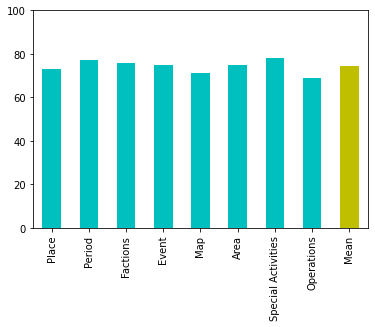

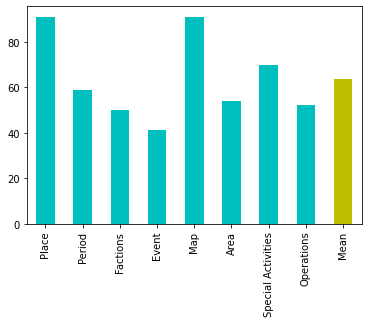

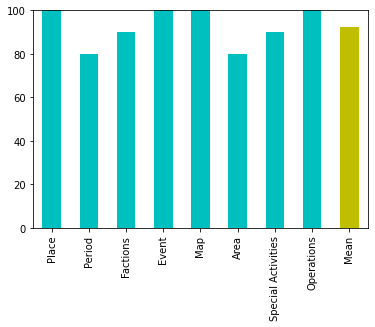

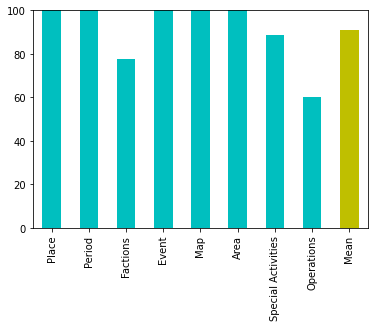

In [ ]:

df_test['percentuale'].plot.bar(color=['c','c','c','c','c','c','c','c','y'])
plt.ylim(0,100)
# fig, ax = plt.subplots()
# bars = ax.barh(df_test.index, percentuale)

#plt.savefig('grafico1.png')
plt.show()

df_test['test'].plot.bar(color=['c','c','c','c','c','c','c','c','y'])
#plt.savefig('grafico2.png')
plt.show()

df_test['estrazione'].plot.bar(color=['c','c','c','c','c','c','c','c','y'])
plt.ylim(0,100)
#plt.savefig('grafico2.png')
plt.show()

df_test['correttezza'].plot.bar(color=['c','c','c','c','c','c','c','c','y'])
plt.ylim(0,100)
#plt.savefig('grafico2.png')
plt.show()

#Programma

In [ ]:
from IPython.display import clear_output 
csv = pd.read_csv('/content/Information-Retrieval-Project/topics.csv')
colonne = csv.columns[1:]

choice = 0

while choice != 5:

  print('\nEnter to continue...\n')
  input()
  clear_output()

  print('\n\n1. Evaluate uniqueness of games based on a topic\n2. Evaluate uniqueness of games based on multiple topics\n3. Search for a game using a word\n4. Search for a game using a sentence\n5. Exit\n')
  choice = 0
  while choice < 1 or choice > 5:
    choice = int(input())
  
  if choice == 5:
    break

  if choice == 2:

    print('\nTopics:')
    for num, e in enumerate(colonne, start = 0):
      print(num, '\t', e)

    print("\nChoose number of topics to evaluate:\n")
    n = 0
    while n < 1 or n > 9:
      n = int(input())

    print("\nChoose the " + str(n) + " topics to evaluate: [e.g.: 3 4 5]\n")

    topic = input().split(' ')
    topics = []
    for i in topic:
      topics.append(colonne[int(i)])
    print('\nTOPICS SELECTED:', [x for x in topics])

    ranking = rank_topic_sim(topics)

    print('\nRanking of uniqueness:')
    for num, e in enumerate(ranking, start=1):
      print(num,'\t', e)

  if choice in [1,3,4]:

    print("\nChoose a topic to evaluate:")
    for num, e in enumerate(colonne, start = 0):
      print(num, '\t', e)

    print('\n')

    topic = -1
    while topic < 0 or topic > 9:
      topic = int(input())

    topic = colonne[topic]

    print('\nTOPIC SELECTED:', topic)

  if choice == 1:

    ranking = rank_topic_sim([topic])

    print('\nRanking of uniqueness for', topic, ':')
    for num, e in enumerate(ranking, start=1):
      print(num,'\t', e)

  elif choice == 3:

    print('\nSearch for a game, enter a word:\n')
    word = input()
    print('\nGame found for \'' + word + '\' in the topic \'' + topic + '\' : \n')
    print(search_word(word, topic).to_markdown())

  elif choice == 4:

    print('\nSearch for a game, enter a sentence:\n')
    sentence = input()
    print('\nGame found for \'' + sentence + '\' in the topic \'' + topic + '\' : \n' )
    print(search_sentence(sentence, topic).to_markdown())



1. Evaluate uniqueness of games based on a topic
2. Evaluate uniqueness of games based on multiple topics
3. Search for a game using a word
4. Search for a game using a sentence
5. Exit




ValueError: ignored